In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset_Citation_Request.txt
/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx
/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.arff


In [2]:
!pip install openpyxl
!pip install flaml

from flaml import AutoML
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 KB 971.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.0
    Uninstalling xgboost-1.6.0:
      Successfully uninstalled xgboost-1.6.0


In [3]:
DryBeanData = pd.read_excel('/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx')
DryBeanData

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
dictForClasses = {k:v for k, v in zip(list(set(DryBeanData.iloc[:, -1].tolist())),
                                     list(range(len(list(set(DryBeanData.iloc[:, -1].tolist()))))))}

In [5]:
dictForClasses

{'SIRA': 0,
 'BARBUNYA': 1,
 'HOROZ': 2,
 'BOMBAY': 3,
 'DERMASON': 4,
 'CALI': 5,
 'SEKER': 6}

In [6]:
for i in range(13611):
    DryBeanData.loc[i, 'Class'] = dictForClasses[DryBeanData.loc[i, 'Class']]

In [7]:
DryBeanData

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,6
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,6
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,6
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,6
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,4
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,4
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,4
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,4


In [8]:
X = np.array(DryBeanData.iloc[:, 0:16])
y = np.asarray(DryBeanData.iloc[:, -1]).astype('int64')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

model = AutoML()
model.fit(X_train, y_train, task='classification', metric='accuracy', time_budget=10)

[flaml.automl: 05-06 02:33:07] {2105} INFO - task = classification
[flaml.automl: 05-06 02:33:07] {2107} INFO - Data split method: stratified
[flaml.automl: 05-06 02:33:07] {2111} INFO - Evaluation method: holdout
[flaml.automl: 05-06 02:33:07] {2188} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-06 02:33:08] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-06 02:33:08] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-06 02:33:08] {2698} INFO - Estimated sufficient time budget=1274s. Estimated necessary time budget=31s.
[flaml.automl: 05-06 02:33:08] {2750} INFO -  at 0.3s,	estimator lgbm's best error=0.1284,	best estimator lgbm's best error=0.1284
[flaml.automl: 05-06 02:33:08] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-06 02:33:08] {2750} INFO -  at 0.4s,	estimator lgbm's best error=0.1284,	best estimator lgbm's best error=0.1284
[flam

In [10]:
print('Best ML Model:', model.best_estimator)
print('Best hyperparmeter config:', model.best_config)
print('Best accuracy on validation data: %f'%(1 - model.best_loss))
print('Training duration of best run: %f s'%(model.best_config_train_time))

Best ML Model: lgbm
Best hyperparmeter config: {'n_estimators': 83, 'num_leaves': 16, 'min_child_samples': 9, 'learning_rate': 0.15922418945050276, 'log_max_bin': 10, 'colsample_bytree': 0.8345075630938922, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.6702305601383631}
Best accuracy on validation data: 0.931907
Training duration of best run: 1.810215 s


In [11]:
import tensorflow as tf
class BeanModel(tf.keras.Model):
    
    def __init__(self):
        super(BeanModel, self).__init__()
        self.B1 = tf.keras.layers.BatchNormalization()
        self.D1 = tf.keras.layers.Dense(64, activation='relu')
        self.Dr1 = tf.keras.layers.Dropout(0.2)
        self.D2 = tf.keras.layers.Dense(128, activation='relu')
        self.D3 = tf.keras.layers.Dense(7, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
    
    def call(self, x):
        x = self.B1(x)
        x = self.D1(x)
        x = self.Dr1(x)
        x = self.D2(x)
        y = self.D3(x)
        return y

TFmodel = BeanModel()
TFmodel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
               metrics=['sparse_categorical_accuracy'])
history = TFmodel.fit(X, y, batch_size=64, epochs=50)

TFmodel.summary()

2022-05-06 02:33:20.864960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 02:33:20.870032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 02:33:20.870758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 02:33:20.871906: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50
213/213 [==============================] - 2s 4ms/step - loss: 0.8109 - sparse_categorical_accuracy: 0.7692
Epoch 2/50
213/213 [==============================] - 1s 2ms/step - loss: 0.4650 - sparse_categorical_accuracy: 0.8655
Epoch 3/50
213/213 [==============================] - 1s 3ms/step - loss: 0.4048 - sparse_categorical_accuracy: 0.8804
Epoch 4/50
213/213 [==============================] - 1s 2ms/step - loss: 0.3804 - sparse_categorical_accuracy: 0.8841
Epoch 5/50
213/213 [==============================] - 1s 2ms/step - loss: 0.3683 - sparse_categorical_accuracy: 0.8844
Epoch 6/50
213/213 [==============================] - 1s 2ms/step - loss: 0.3514 - sparse_categorical_accuracy: 0.8887
Epoch 7/50
213/213 [==============================] - 1s 2ms/step - loss: 0.3473 - sparse_categorical_accuracy: 0.8869
Epoch 8/50
213/213 [==============================] - 1s 2ms/step - loss: 0.3422 - sparse_categorical_accuracy: 0.8907
Epoch 9/50
213/213 [============================

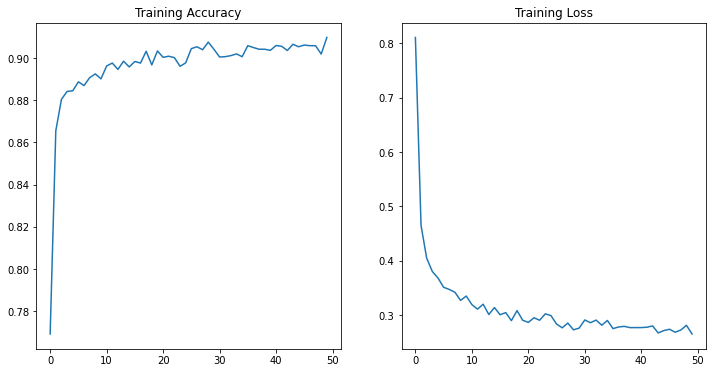

In [12]:
TrainingAcc = history.history['sparse_categorical_accuracy']
TrainingLoss = history.history['loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Training Accuracy')
plt.plot(TrainingAcc)

plt.subplot(1, 2, 2)
plt.title('Training Loss')
plt.plot(TrainingLoss)

plt.show()